# What is the True Normal Human Body Temperature? 

#### Background

The mean normal body temperature was held to be 37$^{\circ}$C or 98.6$^{\circ}$F for more than 120 years since it was first conceptualized and reported by Carl Wunderlich in a famous 1868 book. But, is this value statistically correct?

<div class="span5 alert alert-info">
<h3>Exercises</h3>

<p>In this exercise, you will analyze a dataset of human body temperatures and employ the concepts of hypothesis testing, confidence intervals, and statistical significance.</p>

<p>Answer the following questions <b>in this notebook below and submit to your Github account</b>.</p> 

<ol>
<li>  Is the distribution of body temperatures normal? 
    <ul>
    <li> Although this is not a requirement for CLT to hold (read CLT carefully), it gives us some peace of mind that the population may also be normally distributed if we assume that this sample is representative of the population.
    </ul>
<li>  Is the sample size large? Are the observations independent?
    <ul>
    <li> Remember that this is a condition for the CLT, and hence the statistical tests we are using, to apply.
    </ul>
<li>  Is the true population mean really 98.6 degrees F?
    <ul>
    <li> Would you use a one-sample or two-sample test? Why?
    <li> In this situation, is it appropriate to use the $t$ or $z$ statistic? 
    <li> Now try using the other test. How is the result be different? Why?
    </ul>
<li>  At what temperature should we consider someone's temperature to be "abnormal"?
    <ul>
    <li> Start by computing the margin of error and confidence interval.
    </ul>
<li>  Is there a significant difference between males and females in normal temperature?
    <ul>
    <li> What test did you use and why?
    <li> Write a story with your conclusion in the context of the original problem.
    </ul>
</ol>

You can include written notes in notebook cells using Markdown: 
   - In the control panel at the top, choose Cell > Cell Type > Markdown
   - Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet

#### Resources

+ Information and data sources: http://www.amstat.org/publications/jse/datasets/normtemp.txt, http://www.amstat.org/publications/jse/jse_data_archive.htm
+ Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet

****
</div>

In [64]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

df = pd.read_csv('data/human_body_temperature.csv')
len(df)

130

In [65]:
# Your work here.
df.head()

,temperature,gender,heart_rate
0,99.3,F,68.0
1,98.4,F,81.0
2,97.8,M,73.0
3,99.2,F,66.0
4,98.0,F,73.0


In [41]:
temp = df['temperature']

In [58]:
#Slight left skew
temp.median(), temp.mean()

(98.3, 98.24923076923078)

## Is the distribution of body temperatures normal?

C:\Users\amungale\AppData\Local\Continuum\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


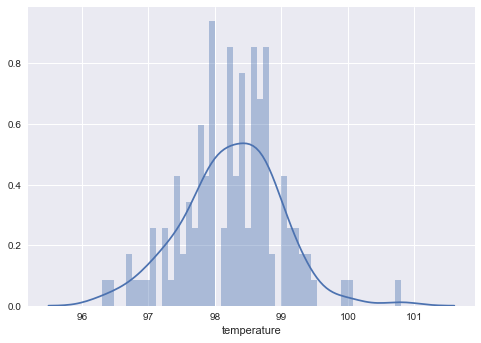

In [62]:
temp = df['temperature']
sns.distplot(temp, bins=50)
plt.show()

In [66]:
scipy.stats.mstats.normaltest(temp, axis=0)

NormaltestResult(statistic=2.7038014333192031, pvalue=0.2587479863488254)

As we can see from the histogram above, the distribution is roughly normal with a slight left skew. The mean temperature of the dataset is 98.25 degrees, and the median is 98.3. Additionally, under the normal test, which is a chi squared test under the null hypothesis of assuming a normal distribution, we fail to reject the null hypothesis. This gives us an extra layer of confidence in assuming the population has a roughly normal distribution.

## Is the sample size large? Are the observations independent?

We are working with 130 samples, which is sufficiently large to invoke the central limit theorem. We can assume the observations are independent and identically distributed, since we are working with different human beings. Additionally if our samples are represenative of the true human population, given our distribution plot above, we can assume the true population of human body temperatures is normally distributed. 

## Is the true population mean really  $98.6^{\circ} F$?

Here, we want to use a one sample test - we are comparing the mean of our single popoulation against the hypothesized mean of the true population. Our null hypothesis will be $\mu = 98.6$ and our alternative hypothesis will be $\mu \neq 98.6$

We will conduct a two tailed t test, because we do not know the standard deviation of the population. 

In [67]:
scipy.stats.ttest_1samp(temp, 98.6, axis=0)

Ttest_1sampResult(statistic=-5.4548232923645195, pvalue=2.4106320415561276e-07)

We have an extremely low p-value, .000000241 so we reject the null hypothesis. We have evidence to believe the true population mean temperature is not $98.6^{\circ} F$. Additionally, we don't need to conduct a Z test, since a T test already overestimates the p-value to account for the estimated standard deviation. 

## At what temperature should we consider someone's temperature to be "abnormal"?

In [72]:
scipy.stats.t.interval(0.99, len(temp)-1, loc=np.mean(temp), scale=scipy.stats.sem(temp))

(98.08110824239759, 98.417353296063965)

Interestingly, our 99% confidence interval gives a temperature range between $98.08^{\circ} F$ and $98.42^{\circ} F$. Given this confidence interval, $98.6^{\circ} F$ would be "abnormally high" if we were just going off of our sample population!

## Is there a significant difference between males and females in normal temperature?

Here we would like to perform a 2 sample t-test. Again, we conservatively choose a t test over a z test despite our sample size, because of the unknown population standard deviation. We have 65 male samples and 65 female samples. We will perform the t test under the null hypothesis that the difference in the means in 0, and the alternative hypothesis that the difference in means is not 0.

In [80]:
male = df[df['gender']=='M']['temperature']
female = df[df['gender']=='F']['temperature']
len(male), len(female)

(65, 65)

In [81]:
scipy.stats.ttest_ind(male, female, axis=0, equal_var=True)

Ttest_indResult(statistic=-2.2854345381656103, pvalue=0.023931883122395609)

In [82]:
scipy.stats.ttest_ind(male, female, axis=0, equal_var=False)

Ttest_indResult(statistic=-2.2854345381656112, pvalue=0.023938264182934196)

We perform the t test twice, once with the assumption that the male and female populations have the same variance, and once without. Both tests return a p-value of about 0.0239. At a 5% significance level, we have evidence to reject the null hypothesis, but at a 1% significance level we do not. In conclusion, we have evidence in our sample population that the true human body temperature mean is not $98.6^{\circ}$. Additionally, we are sketpical that there is a real difference in the mean body temperature between males and females.